In [73]:
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

index                                                     float32
Rango                                                     float32
Año de Lanzamiento                                        float32
América del Norte                                         float32
Europa                                                    float32
                                                           ...   
Casa Productora_Virgin Interactive                        float32
Casa Productora_Vivendi Games                             float32
Casa Productora_Warner Bros. Interactive Entertainment    float32
Casa Productora_Westwood Studios                          float32
Casa Productora_id Software                               float32
Length: 134, dtype: object
index                                                     float32
Rango                                                     float32
Año de Lanzamiento                                        float32
América del Norte                                

In [72]:
# Eliminar columnas no numéricas (como 'Título del Juego') y columnas booleanas (si no las necesitas)
X_train = X_train.select_dtypes(include=['float64', 'int64', 'bool'])
X_test = X_test.select_dtypes(include=['float64', 'int64', 'bool'])

# Convertir todas las columnas numéricas a tipo 'float32'
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Verificar si hay NaNs en las matrices de características
print("¿Hay NaNs en X_train?", np.isnan(X_train).sum())
print("¿Hay NaNs en X_test?", np.isnan(X_test).sum())

# Si hay NaNs, eliminarlos de X_train y X_test (esto también eliminará las filas correspondientes en y_train y y_test)
mask_train = ~np.isnan(X_train).any(axis=1)
mask_test = ~np.isnan(X_test).any(axis=1)

X_train = X_train[mask_train]
X_test = X_test[mask_test]
y_train = y_train[mask_train]
y_test = y_test[mask_test]

# Verificar las dimensiones de los datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")

# Reestructurar X_train y X_test para que tengan la forma adecuada para el modelo LSTM
# Asegúrate de que la forma de las entradas sea (muestras, pasos de tiempo, características)
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Verificar las formas de X_train_reshaped y X_test_reshaped
print(f"Forma de X_train_reshaped: {X_train_reshaped.shape}")
print(f"Forma de X_test_reshaped: {X_test_reshaped.shape}")

# Verificar que y_train y y_test sean del tipo correcto
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Ahora, define y entrena el modelo LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], 1)),  # reemplaza input_shape en LSTM
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluación del modelo
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Loss en el conjunto de prueba: {loss}")


¿Hay NaNs en X_train? index                                                     0
Rango                                                     0
Año de Lanzamiento                                        0
América del Norte                                         0
Europa                                                    0
                                                         ..
Casa Productora_Virgin Interactive                        0
Casa Productora_Vivendi Games                             0
Casa Productora_Warner Bros. Interactive Entertainment    0
Casa Productora_Westwood Studios                          0
Casa Productora_id Software                               0
Length: 134, dtype: int64
¿Hay NaNs en X_test? index                                                     0
Rango                                                     0
Año de Lanzamiento                                        0
América del Norte                                         0
Europa                         

In [76]:
# Verificar si hay columnas con tipo de dato 'object' en X
print(X_train.dtypes)

# Asegurarse de que todos los valores sean numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Asegurarse de que no haya valores NaN después de la conversión
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


index                                                     float64
Rango                                                     float64
Título del Juego                                           object
Año de Lanzamiento                                        float64
América del Norte                                         float64
                                                           ...   
Casa Productora_Virgin Interactive                           bool
Casa Productora_Vivendi Games                                bool
Casa Productora_Warner Bros. Interactive Entertainment       bool
Casa Productora_Westwood Studios                             bool
Casa Productora_id Software                                  bool
Length: 135, dtype: object


In [82]:
# Convertir las columnas booleanas a enteros (0 o 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [83]:
# Verificar si alguna columna sigue siendo de tipo 'object' o 'category'
print(X_train.dtypes)

index                                                     int64
Rango                                                     int64
Año de Lanzamiento                                        int64
América del Norte                                         int64
Europa                                                    int64
                                                          ...  
Casa Productora_Virgin Interactive                        int64
Casa Productora_Vivendi Games                             int64
Casa Productora_Warner Bros. Interactive Entertainment    int64
Casa Productora_Westwood Studios                          int64
Casa Productora_id Software                               int64
Length: 134, dtype: object


In [84]:
# Verificar las dimensiones después de reshape
print(X_train_reshaped.shape)  # Debería ser (n_samples, n_features, 1)
print(X_test_reshaped.shape)   # Debería ser (n_samples, n_features, 1)

(1502, 134, 1)
(376, 134, 1)


In [87]:
from tensorflow.keras.layers import Input, GRU, Dense

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # No necesitamos input_shape en GRU
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
print(y_train.dtypes)
print(y_test.dtypes)

float64
float64


In [91]:
print(y_train.unique())
print(y_test.unique())

[1. 0.]
[1. 0.]


In [92]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(y_train.shape)
print(y_test.shape)


(1502, 134, 1)
(376, 134, 1)
(1502,)
(376,)


In [95]:
print(X_train_reshaped.dtype)
print(X_test_reshaped.dtype)

object
object


In [96]:
# Convertir X_train y X_test a valores numéricos
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Llenar NaN con 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Verificar que los datos sean ahora numéricos
print(X_train.dtypes)
print(X_test.dtypes)

# Luego, hacer el reshape
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Verificar el tipo de dato después de reshape
print(X_train_reshaped.dtype)
print(X_test_reshaped.dtype)


index                                                     int64
Rango                                                     int64
Año de Lanzamiento                                        int64
América del Norte                                         int64
Europa                                                    int64
                                                          ...  
Casa Productora_Virgin Interactive                        int64
Casa Productora_Vivendi Games                             int64
Casa Productora_Warner Bros. Interactive Entertainment    int64
Casa Productora_Westwood Studios                          int64
Casa Productora_id Software                               int64
Length: 134, dtype: object
index                                                     int64
Rango                                                     int64
Año de Lanzamiento                                        int64
América del Norte                                         int64
Europa       

In [97]:
X_train_reshaped = X_train_reshaped.astype(np.float64)
X_test_reshaped = X_test_reshaped.astype(np.float64)

# Verificar los tipos de datos después de la conversión
print(X_train_reshaped.dtype)
print(X_test_reshaped.dtype)

float64
float64


In [98]:
# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7697 - loss: 0.6543 - val_accuracy: 0.8112 - val_loss: 0.5219
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8398 - loss: 0.5287 - val_accuracy: 0.8112 - val_loss: 0.5795
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8357 - loss: 0.5593 - val_accuracy: 0.8112 - val_loss: 0.5431
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8391 - loss: 0.5118 - val_accuracy: 0.8112 - val_loss: 0.4987
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8411 - loss: 0.4550 - val_accuracy: 0.8112 - val_loss: 0.4907
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8407 - loss: 0.4391 - val_accuracy: 0.8112 - val_loss: 0.4873
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8455 - loss: 0.4311 - val_accuracy: 0.8112 - val_loss: 0.4854
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8330 - loss: 0.4513 - val_accuracy: 0.8112 - v

C:\Users\chris\AppData\Local\Temp\ipykernel_23064\1436025341.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Puntaje de Reseña'].fillna(df['Puntaje de Reseña'].mean(), inplace=True)


Epoch 1/50


C:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9114 - loss: 1.8301 - val_accuracy: 0.9894 - val_loss: 0.0239
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9894 - val_loss: 0.0212
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9708 - loss: 0.0683 - val_accuracy: 0.9601 - val_loss: 0.1968
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1682 - val_accuracy: 0.9973 - val_loss: 0.0074
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9760 - loss: 0.0861 - val_accuracy: 0.9894 - val_loss: 0.0233
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9858 - loss: 0.0412 - val_accuracy: 0.9601 - val_loss: 0.1875
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9947 - val_loss: 0.0099
Epo

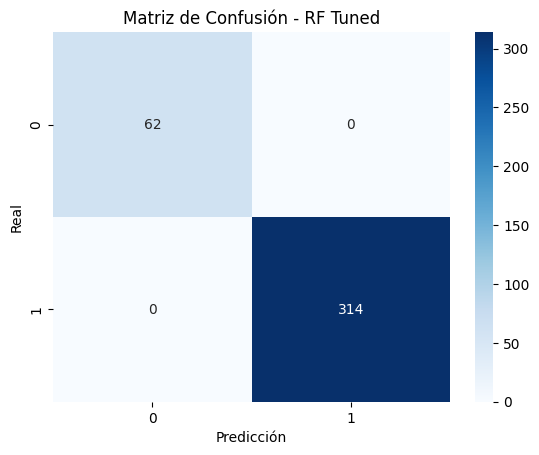

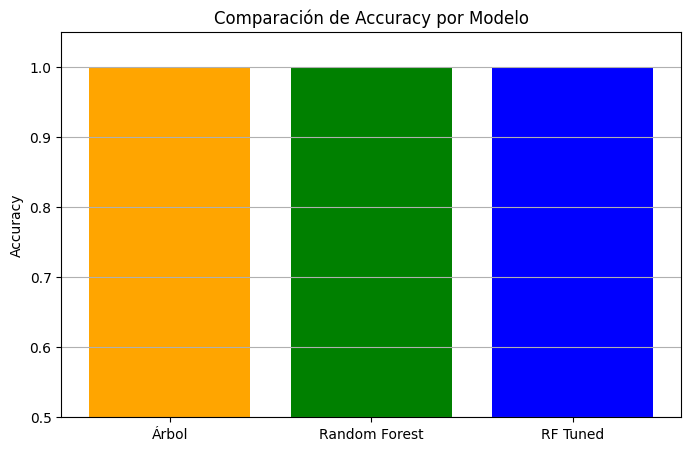

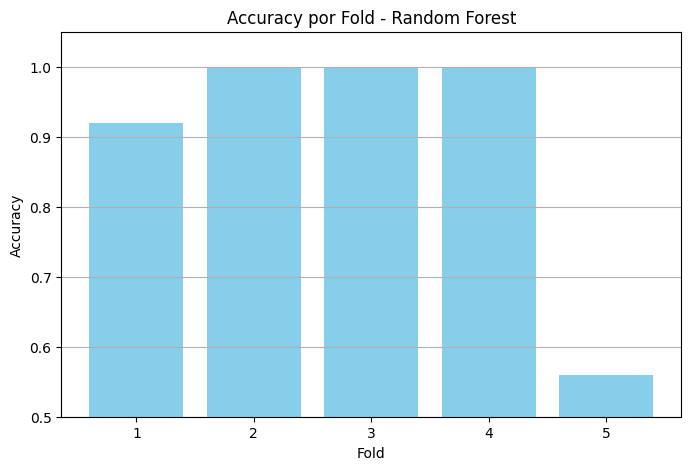

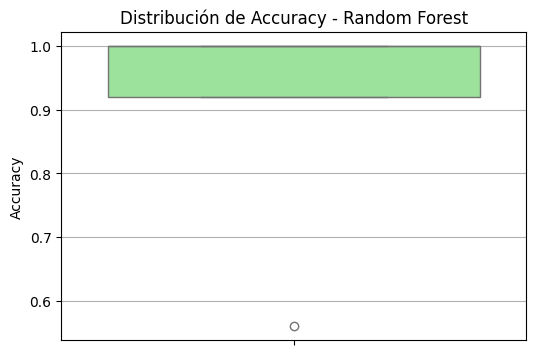

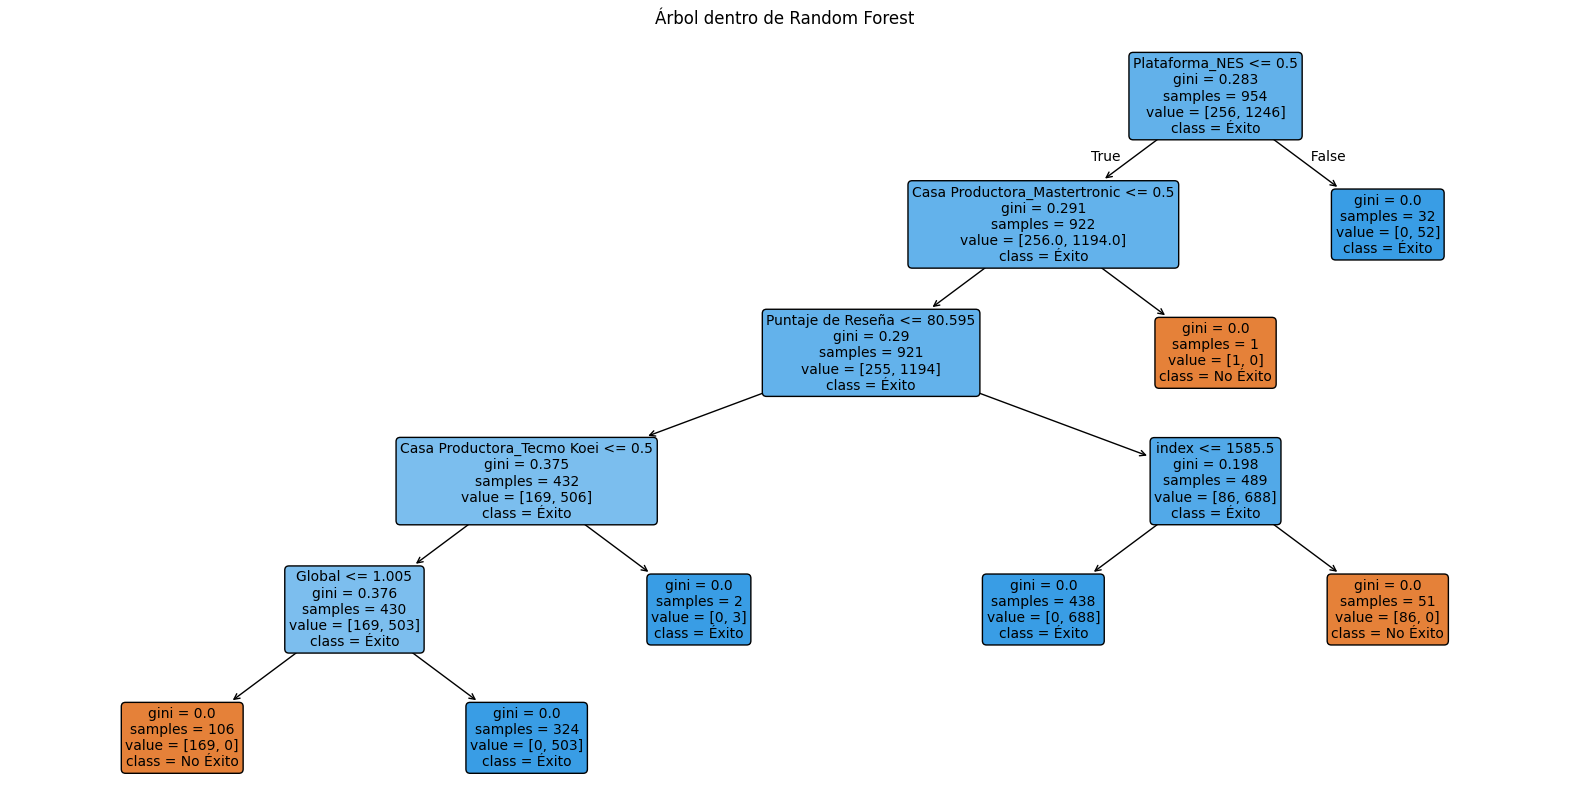

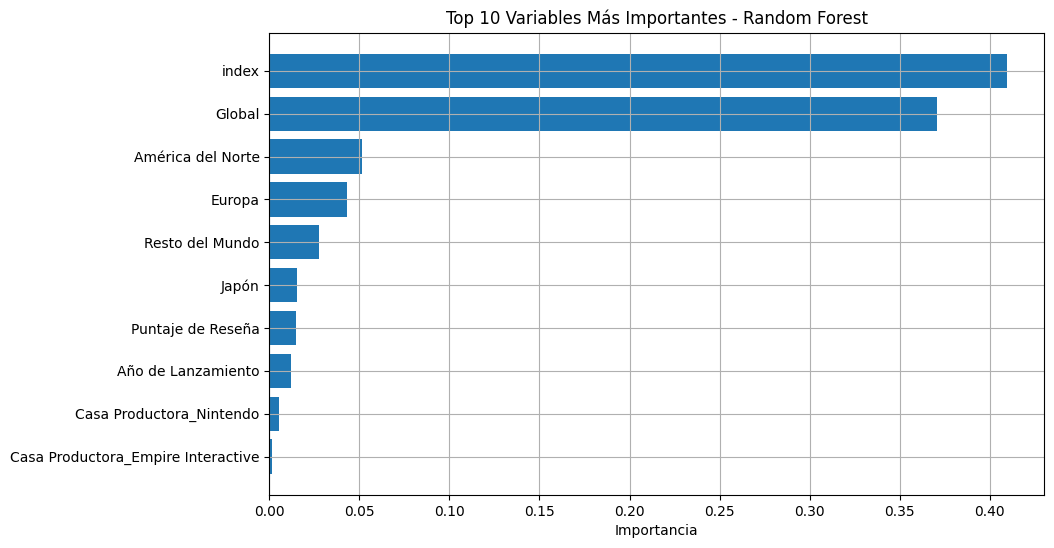

In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Cargar el dataset
df = pd.read_csv('C:/Users/chris/Proyectos BEDU/Proyecto Análisis de datos en Python/Video Games Sales.csv')
df.dropna(inplace=True)

# Renombrar columnas
df.columns = df.columns.str.strip()
df.rename(columns={
    'Rank': 'Rango',
    'Game Title': 'Título del Juego',
    'Platform': 'Plataforma',
    'Year': 'Año de Lanzamiento',
    'Genre': 'Género',
    'Publisher': 'Casa Productora',
    'North America': 'América del Norte',
    'Europe': 'Europa',
    'Japan': 'Japón',
    'Rest of World': 'Resto del Mundo',
    'Global': 'Global',
    'Review': 'Puntaje de Reseña'
}, inplace=True)

# Limpiar y convertir datos
df['Título del Juego'] = df['Título del Juego'].str.strip().str.title()
df['Año de Lanzamiento'] = df['Año de Lanzamiento'].astype(int)

cols_float = ['América del Norte', 'Europa', 'Japón', 'Resto del Mundo', 'Global', 'Puntaje de Reseña']
for col in cols_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['Puntaje de Reseña'].fillna(df['Puntaje de Reseña'].mean(), inplace=True)

# Crear variable objetivo
df['Éxito'] = np.where(df['Global'] > 1.0, 1, 0)

# One-hot encoding
df = pd.get_dummies(df, columns=['Plataforma', 'Género', 'Casa Productora'], drop_first=True)
df_modelo = df.drop(['Título del Juego', 'Rango'], axis=1)

# Dividir en X e y
X = df_modelo.drop('Éxito', axis=1)
y = df_modelo['Éxito']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Validación cruzada
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# GridSearchCV para Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Regresión lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Red neuronal
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
loss, nn_accuracy = nn_model.evaluate(X_test, y_test)

# === REPORTES Y VISUALIZACIONES ===

# Árbol
print("\nÁrbol de Decisión")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Random Forest
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# RF Tuned
print("\nRandom Forest Tuned")
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Logística
print("\nRegresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Lineal
print("\nRegresión Lineal")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2:", r2_score(y_test, y_pred_lin))

# Red Neuronal
print("\nRed Neuronal")
print("Accuracy:", nn_accuracy)

# Matriz de confusión RF Tuned
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - RF Tuned")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Comparación de modelos
modelos = ['Árbol', 'Random Forest', 'RF Tuned']
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_tuned)
]
plt.figure(figsize=(8, 5))
plt.bar(modelos, accuracies, color=['orange', 'green', 'blue'])
plt.ylim(0.5, 1.05)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy por Modelo')
plt.grid(axis='y')
plt.show()

# Accuracy por Fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), rf_cv_scores, color='skyblue')
plt.ylim(0.5, 1.05)
plt.title("Accuracy por Fold - Random Forest")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=rf_cv_scores, color="lightgreen")
plt.title("Distribución de Accuracy - Random Forest")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.show()

# Visualizar árbol
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["No Éxito", "Éxito"],
          filled=True, rounded=True, fontsize=10)
plt.title("Árbol dentro de Random Forest")
plt.show()

# Importancia de variables
importancias = rf_model.feature_importances_
indices = np.argsort(importancias)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importancias[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Importancia")
plt.title("Top 10 Variables Más Importantes - Random Forest")
plt.grid()
plt.show()


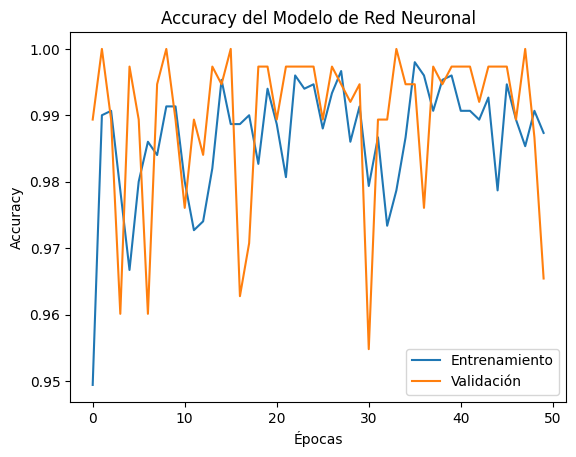

In [101]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy del Modelo de Red Neuronal')
plt.legend()

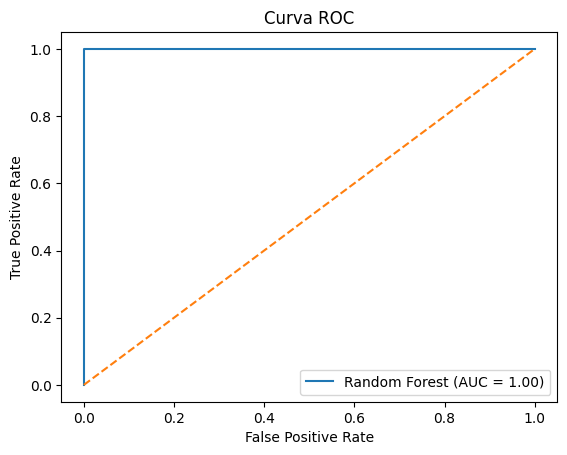

In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()
